# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_diabetes 

In [4]:
diabetes = load_diabetes() 
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [7]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [8]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
df['target'] = diabetes['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: >

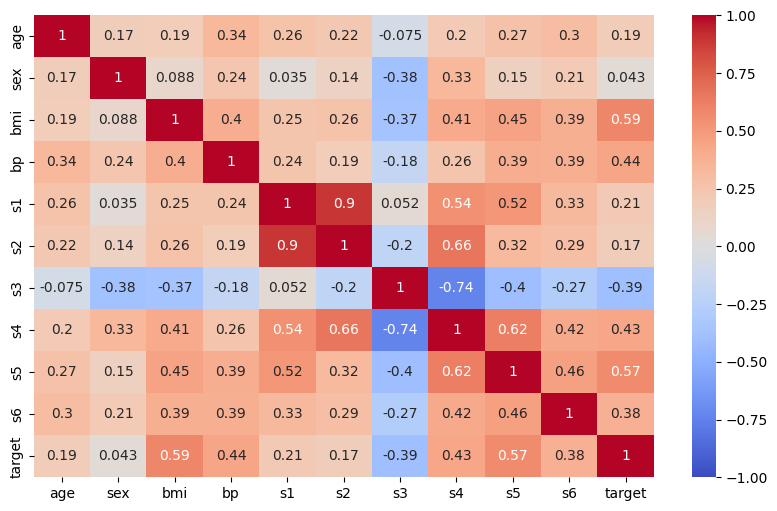

In [11]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot= True, vmin=-1, cmap='coolwarm') 

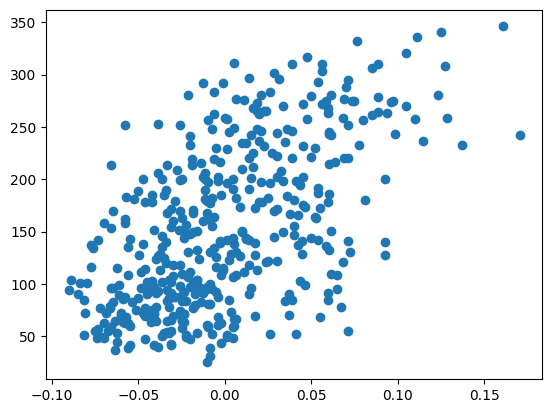

In [13]:
plt.scatter(df['bmi'], df['target'])

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [14]:
from sklearn.linear_model import LinearRegression 

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [16]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [17]:
diabetes_data_train = df.drop("target", axis="columns")[:-20]
diabetes_data_test = df.drop("target", axis="columns")[-20:]
diabetes_target_train = df['target'][:-20]
diabetes_target_test = df['target'][-20:]

In [18]:
print(diabetes_data_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_train.shape)
print(diabetes_target_test.shape)

(422, 10)
(20, 10)
(422,)
(20,)


In [19]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 'columns'), df['target'], test_size=20, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(422, 10)
(20, 10)
(422,)
(20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [20]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [21]:
diabetes_model.intercept_

np.float64(152.76429169049118)

In [22]:
diabetes_model.coef_

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

y = a + b*x1 + c*x2 + d*x3 + ....

In [23]:
y_pred =diabetes_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [24]:
y_pred - y_test

422   -35.381015
423    64.440320
424    61.888751
425   -40.467294
426    44.793973
427    64.067659
428   -50.875588
429     6.478737
430   -65.939946
431    58.302616
432    45.368681
433   -10.804181
434    83.248379
435    56.332935
436     4.545130
437    16.037468
438    -1.424357
439    -8.432213
440    -8.965347
441    -4.397783
Name: target, dtype: float64

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [26]:
print("R2 score train", r2_score(diabetes_target_train, diabetes_model.predict(diabetes_data_train)))
print("R2 score test", r2_score(diabetes_target_test, y_pred))

R2 score train 0.5122247821066493
R2 score test 0.585085427447195


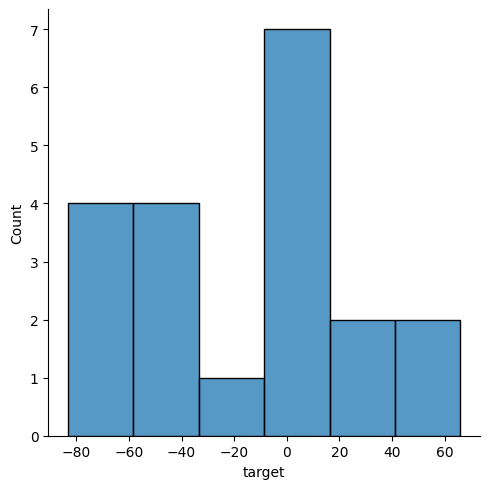

In [27]:
sns.displot(diabetes_target_test - y_pred)

#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [28]:
X = df[['bmi', 's5']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

model_2 = LinearRegression()

model_2.fit(X_train, y_train)

print(model_2.intercept_)
print(model_2.coef_)

152.94615870263704
[669.65259645 609.7326832 ]


In [29]:

print("r2_score", r2_score(diabetes_target_test, y_pred))
print("mean_absolute_error", mean_absolute_error(diabetes_target_test, y_pred))
print("mean_squared_error", mean_squared_error(diabetes_target_test, y_pred))
print("root_mean_squared_error", mean_squared_error(diabetes_target_test, y_pred)**(1/2))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(diabetes_target_test, y_pred))

r2_score 0.585085427447195
mean_absolute_error 36.60961865545879
mean_squared_error 2004.5186863342092
root_mean_squared_error 44.77185149548999
mean_absolute_percentage_error 0.3930876102873051


In [30]:
y_pred = model_2.predict(X_test)

print("r2_score", r2_score(diabetes_target_test, y_pred))
print("mean_absolute_error", mean_absolute_error(diabetes_target_test, y_pred))
print("mean_squared_error", mean_squared_error(diabetes_target_test, y_pred))
print("root_mean_squared_error", mean_squared_error(diabetes_target_test, y_pred)**(1/2))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(diabetes_target_test, y_pred))

r2_score 0.5892318883637471
mean_absolute_error 38.50310382735568
mean_squared_error 1984.4864702125997
root_mean_squared_error 44.547575357280664
mean_absolute_percentage_error 0.43202725697077415


In [34]:
from sklearn.preprocessing import StandardScaler
X = df[['bmi', 's5']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

model_3 = LinearRegression()

model_3.fit(X_train_scal, y_train)

print(model_3.intercept_)
print(model_3.coef_)

153.36255924170615
[31.86767946 29.23112386]


In [35]:
y_pred = model_3.predict(X_test_scal)

print("r2_score", r2_score(diabetes_target_test, y_pred))
print("mean_absolute_error", mean_absolute_error(diabetes_target_test, y_pred))
print("mean_squared_error", mean_squared_error(diabetes_target_test, y_pred))
print("root_mean_squared_error", mean_squared_error(diabetes_target_test, y_pred)**(1/2))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(diabetes_target_test, y_pred))


r2_score 0.5892318883637471
mean_absolute_error 38.503103827355666
mean_squared_error 1984.4864702125997
root_mean_squared_error 44.547575357280664
mean_absolute_percentage_error 0.43202725697077415


In [36]:
model_3.predict(scaler.transform([[10000,10]]))

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6702776.23745161])